<center>

#<b>CS353 ML Lab 6</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Batch: Section-2
### Date: 16/03/2021
---
###Q: Write a program to demonstrate Image Recognition. Classify the data using svm and try to identify the images present in the data set.
---
####<b>Dataset Used: Digits Dataset</b> 
</center>

##<b>Importing Libraries and Dataset</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn import datasets

from sklearn.metrics import plot_confusion_matrix,explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report


In [2]:
dataset = datasets.load_digits()
#printing 5 sample tuples
print(dataset.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

##<b>Data Preprocessing</b>

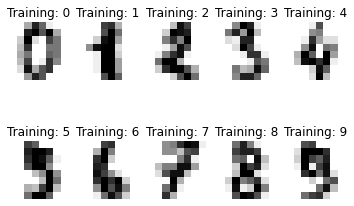

In [4]:
for i in range(0,10):
    plt.subplot(2, 5,i + 1)
    plt.axis('off')
    imside = int(np.sqrt(dataset.data[i].shape[0]))
    im1 = np.reshape(dataset.data[i],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(dataset.target[i]))
plt.show()

In [5]:
x = dataset.data
y = dataset.target

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5, shuffle=True)

# Displaying the size of the split
print('Test set size:\nX_test =', len(x_test), '\ny_test =', len(y_test), '\n')
print('Training set size\nX_train =', len(x_train), '\ny_train =', len(y_train))

Test set size:
X_test = 360 
y_test = 360 

Training set size
X_train = 1437 
y_train = 1437


##<b>Training the SVM Model</b>

In [7]:
model = svm.SVC(kernel='poly',gamma=0.001)
#fit to the training data
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

##<b>Results</b>

In [8]:
print("\nAccuracy: %.2f" %(accuracy_score(y_test, y_pred)*100))
print("Mean Squared Error: %.2f" %(mean_squared_error(y_test, y_pred)*100))
print('Report',classification_report(y_test, y_pred))



Accuracy: 98.33
Mean Squared Error: 12.50
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       1.00      0.95      0.97        37
           4       1.00      1.00      1.00        32
           5       0.96      0.98      0.97        46
           6       1.00      0.97      0.98        30
           7       1.00      0.98      0.99        42
           8       0.97      1.00      0.99        38
           9       0.93      0.97      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



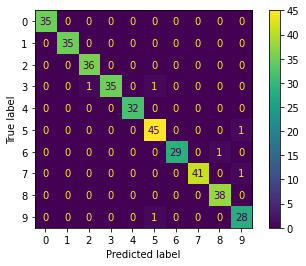

In [9]:
plot_confusion_matrix(model, x_test, y_test)